# PROJETO 7

### This dataset contains daily observations of some weather stations in Australia.

### The objective is constructing a predictive model to determine whether or not it will rain tomorrow.

#### Dataset: rain_data_aus.csv



# Import Libraries

## Library versions


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [21]:
import pandas
import matplotlib
import numpy
import seaborn
import geopy
import tqdm
import sklearn
version = [i.__version__ for i in [pandas, matplotlib, numpy, seaborn, geopy, tqdm, sklearn]]
packages = ['pandas', 'matplotlib', 'numpy', 'seaborn', 'geopy', 'tqdm', 'sklearn']
list(zip(packages, version))

[('pandas', '0.25.3'),
 ('matplotlib', '3.1.1'),
 ('numpy', '1.18.1'),
 ('seaborn', '0.9.0'),
 ('geopy', '1.21.0'),
 ('tqdm', '4.42.0'),
 ('sklearn', '0.22.2.post1')]

# Import Datasets & merge

In [21]:
data = pd.read_csv('rain_data_aus.csv')
winds = pd.DataFrame()

for number in [1,2,3,4,5,6,7]:
    df = pd.read_csv(f'wind_table_0{number}.csv')
    df.columns = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
    winds = pd.concat([winds,df])
data = pd.merge(data, winds, on=['date','location'])

# Exploring Data

## **Analysis of *coluna_vigente***

Here we can analyse if  *coluna_vigente* will show the probability of raining in the next day.
In other words, it would be the prediction of the column *raintomorrow*

In [22]:
testi = data.loc[:,['raintomorrow','modelo_vigente']]

In [23]:
testi['prev'] = testi.modelo_vigente.apply(lambda x: x > 0.5)
testi['real'] = testi.raintomorrow.apply(lambda x: x == 'Yes')

In [24]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev)
print(CM)          

[[108365   1951]
 [  7945  23932]]


In [25]:
from sklearn.metrics import classification_report

print(classification_report(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev))

              precision    recall  f1-score   support

       False       0.93      0.98      0.96    110316
        True       0.92      0.75      0.83     31877

    accuracy                           0.93    142193
   macro avg       0.93      0.87      0.89    142193
weighted avg       0.93      0.93      0.93    142193



In [26]:
tn, fp, fn, tp = confusion_matrix(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev).ravel()

precision = tp / (fp + tp)
recall = tp / (fn + tp)

print("precision :", precision)
print("recall :",round(recall,4))

precision : 0.9246223389869799
recall : 0.7508


In [27]:
prec = []
rec = []

for number in np.arange(0,1,0.05):

    testi['prev'] = testi.modelo_vigente.apply(lambda x: x > number)
    testi['real'] = testi.raintomorrow.apply(lambda x: x == 'Yes')


    tn, fp, fn, tp = confusion_matrix(testi.iloc[:,[2,3]].real,testi.iloc[:,[2,3]].prev).ravel()

    prec.append(tp / (fp + tp))
    rec.append(tp / (fn + tp))

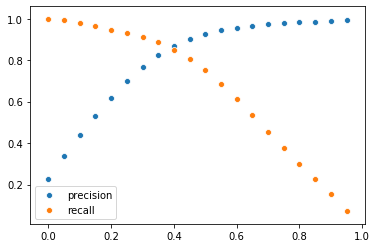

In [28]:
sns.scatterplot(x=np.arange(0,1,0.05), y=prec,label='precision')
sns.scatterplot(x=np.arange(0,1,0.05), y=rec,label='recall')

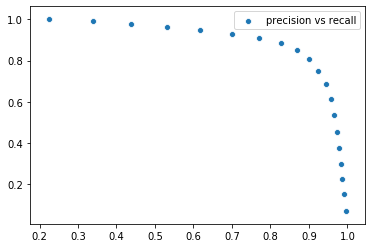

In [29]:
sns.scatterplot(x=prec, y=rec,label='precision vs recall')

## **dataframe: describe, info, columns... etc**

In [30]:
print('Null data percentage:\n')
print(round(data.isna().sum()/data.shape[0]*100, 2))

Null data percentage:

date                 0.00
location             0.00
mintemp              0.45
maxtemp              0.23
rainfall             0.99
evaporation         42.79
sunshine            47.69
humidity9am          1.25
humidity3pm          2.54
pressure9am          9.86
pressure3pm          9.83
cloud9am            37.74
cloud3pm            40.15
temp9am              0.64
temp3pm              1.92
raintoday            0.99
amountOfRain         0.00
raintomorrow         0.00
temp                 0.23
humidity             2.54
precipitation3pm     0.00
precipitation9am     0.00
modelo_vigente       0.00
wind_gustdir         6.56
wind_gustspeed       6.52
wind_dir9am          7.04
wind_dir3pm          2.66
wind_speed9am        0.95
wind_speed3pm        1.85
dtype: float64


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,163614.0,12.166114,6.401191,-8.500000,7.600000,11.900000,16.800000,33.90000
maxtemp,163989.0,23.190111,7.120299,-4.800000,17.900000,22.600000,28.200000,48.10000
rainfall,162767.0,2.354322,8.417735,0.000000,0.000000,0.000000,0.800000,371.00000
evaporation,90128.0,5.494619,4.275539,0.000000,2.600000,4.800000,7.400000,145.00000
sunshine,80607.0,7.607071,3.778324,0.000000,4.900000,8.400000,10.600000,14.50000
humidity9am,162352.0,69.084495,18.993050,0.000000,57.000000,70.000000,83.000000,100.00000
humidity3pm,159262.0,51.669563,20.760959,0.000000,37.000000,52.000000,66.000000,100.00000
pressure9am,148085.0,1017.645456,7.129291,980.500000,1012.900000,1017.600000,1022.400000,1041.00000
pressure3pm,148113.0,1015.245303,7.056098,977.100000,1010.400000,1015.200000,1020.000000,1039.60000
cloud9am,100879.0,4.505328,2.893438,0.000000,1.000000,5.000000,7.000000,9.00000


In [31]:
data.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0


In [32]:
data.loc[(data.raintoday == 'No') & (data.precipitation9am > 1)].shape

(105440, 29)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 29 columns):
date                142193 non-null object
location            142193 non-null object
mintemp             141556 non-null float64
maxtemp             141871 non-null float64
rainfall            140787 non-null float64
evaporation         81350 non-null float64
sunshine            74377 non-null float64
humidity9am         140419 non-null float64
humidity3pm         138583 non-null float64
pressure9am         128179 non-null float64
pressure3pm         128212 non-null float64
cloud9am            88536 non-null float64
cloud3pm            85099 non-null float64
temp9am             141289 non-null float64
temp3pm             139467 non-null float64
raintoday           140787 non-null object
amountOfRain        142193 non-null float64
raintomorrow        142193 non-null object
temp                141871 non-null float64
humidity            138583 non-null float64
precipitation3pm 

## **Rain data: analysis**

In [34]:
#data for analysis
prec = data.loc[:,['date', 'location', 'rainfall', 'precipitation3pm','precipitation9am']]
prec.loc[:,'date'] =  pd.to_datetime(prec.loc[:,'date'])
prec = prec.loc[prec.date <= '2016-06-24']

In [36]:
prec['prec_last_24h'] = prec['precipitation3pm'] + prec['precipitation9am']

bob = prec.groupby(by=['location','date']).mean().reset_index()
bob['year'] = bob.date.apply(lambda x: x.year)
bob['month'] = bob.date.apply(lambda x: x.month)
bob['2_week_period'] = bob.date.apply(lambda x: 1 if x.day in list(np.arange(1,16)) else 2)

bob = bob.groupby(by=['year','month','2_week_period','location']).sum().reset_index()

cities = {}

for city in tqdm(bob.location.unique()):
    df = bob.query(f'location == "{city}"').drop(columns = 'location').reset_index(drop=True)
    cities[city] = df

100%|█████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 170.82it/s]


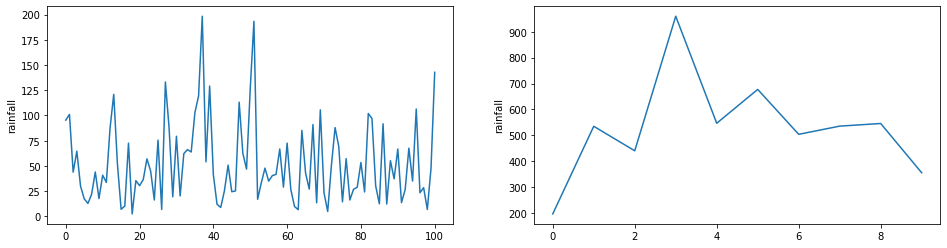

In [38]:
c = cities['Canberra']

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).sum().drop(columns='2_week_period').reset_index()
c3 = c.groupby(by=['year']).sum().drop(columns=['2_week_period','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

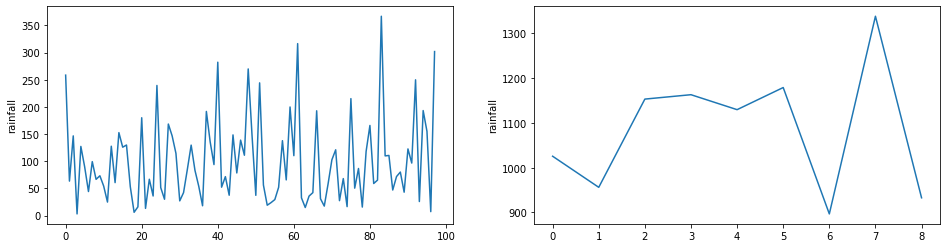

In [39]:
c = cities['Sydney']

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).sum().drop(columns='2_week_period').reset_index()
c3 = c.groupby(by=['year']).sum().drop(columns=['2_week_period','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

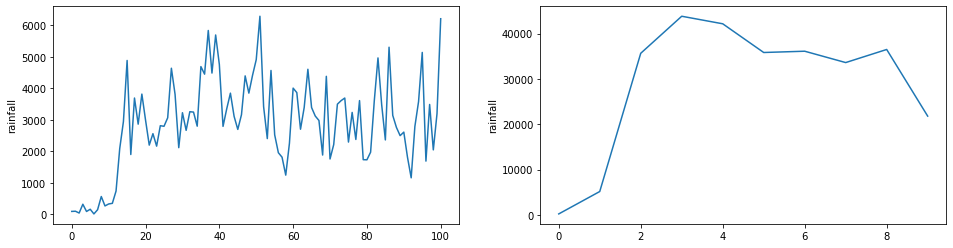

In [40]:
c = bob

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).sum().drop(columns='2_week_period').reset_index()
c3 = c.groupby(by=['year']).sum().drop(columns=['2_week_period','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

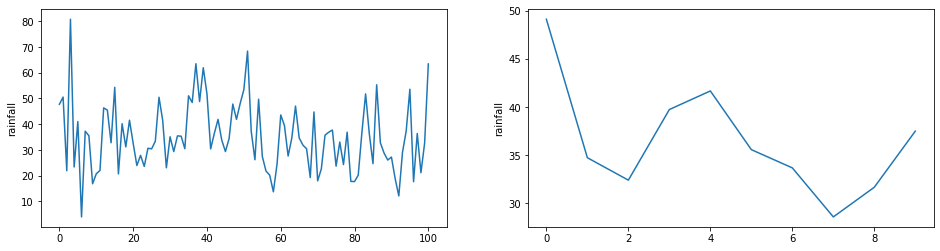

In [179]:
c = bob

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

c2 = c.groupby(by=['year','month']).mean().drop(columns='quinzena').reset_index()
c3 = c.groupby(by=['year']).mean().drop(columns=['quinzena','month']).reset_index()
sns.lineplot(x=c2.index, y='rainfall',data=c2,ax=ax[0])
sns.lineplot(x=c3.index, y='rainfall',data=c3,ax=ax[1])

Removing some years might help.

## Relationships Analysis

### **relationship *raintoday* and *rainfall***

*raintoday* seems to be derived from *rainfall*

In [41]:
xmax = data.loc[data.raintoday == 'No'].rainfall.max()
xmin = data.loc[data.raintoday == 'No'].rainfall.min()
yesmin = data.loc[data.raintoday == 'Yes'].rainfall.min()

In [42]:
print(f'minimum rainfall for necessary for raintoday = False: {xmin}')
print(f'maximum rainfall for necessary for raintoday = False: {xmax}')
print(f'minimum rainfall for necessary for raintoday = True: {yesmin}')

minimum rainfall for necessary for raintoday = False: 0.0
maximum rainfall for necessary for raintoday = False: 1.0
minimum rainfall for necessary for raintoday = True: 1.1


### **relationship *raintomorrow* and *amountOfRain***

*raintomorrow* seems to be derived from *amountOfRain*

In [43]:
x_true_min = data.loc[(data.raintomorrow == 'No')].amountOfRain.min()
x_true_max = data.loc[(data.raintomorrow == 'No')].amountOfRain.max()
x_false_min = data.loc[(data.raintomorrow == 'Yes')].amountOfRain.min()

In [44]:
print(f'minimum rainfall for necessary for raintomorrow = False: {x_true_min}')
print(f'maximum rainfall for necessary for raintomorrow = False: {x_true_max}')
print(f'minimum rainfall for necessary for raintomorrow = True: {x_false_min}')

minimum rainfall for necessary for raintomorrow = False: 0.0
maximum rainfall for necessary for raintomorrow = False: 1.0
minimum rainfall for necessary for raintomorrow = True: 1.1


### relationship *rainfall* and *amountOfRain*

However, if we consider rainfall being on time 'T' and amountOfRain bein on time 'T+1', if we bring them to the same time window, we can see a really high High correlation between 

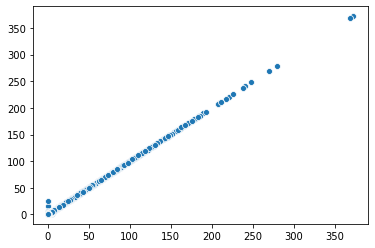

In [45]:
expectancy = np.array(data.amountOfRain[0:-1]) + 1
reality = np.array(data.rainfall[1:]) + 1

error = (expectancy - reality)/reality *100

sns.scatterplot(x=expectancy, y=reality)

### Discrepancy between rainfall/raintoday and raintomorrow/amountOfRain

In addition to the 1406 missing values from *rainfall*/*raintoday*, *raintomorrow*/*amountOfRain*. It should be
similar, since the seconds "will be" the first ones in a time t+1.

However, we have 13 rows with discrepant values between the two pairs!

In [46]:
pd.concat(  [data.rainfall[1:].reset_index(drop=True), 
             data.raintoday[1:].reset_index(drop=True),
             data.raintomorrow[0:-1].reset_index(drop=True),
             data.amountOfRain[0:-1].reset_index(drop=True)
            ],axis=1).dropna().query('raintoday != raintomorrow')

,rainfall,raintoday,raintomorrow,amountOfRain
3010,0.0,No,Yes,1.4
29496,15.6,Yes,No,0.0
53673,3.2,Yes,No,0.0
56701,0.0,No,Yes,3.0
65744,2.0,Yes,No,0.4
68179,0.0,No,Yes,1.4
75751,0.0,No,Yes,4.2
81693,0.0,No,Yes,1.6
90822,23.6,Yes,No,0.0
93855,5.0,Yes,No,0.0


### temperature columns

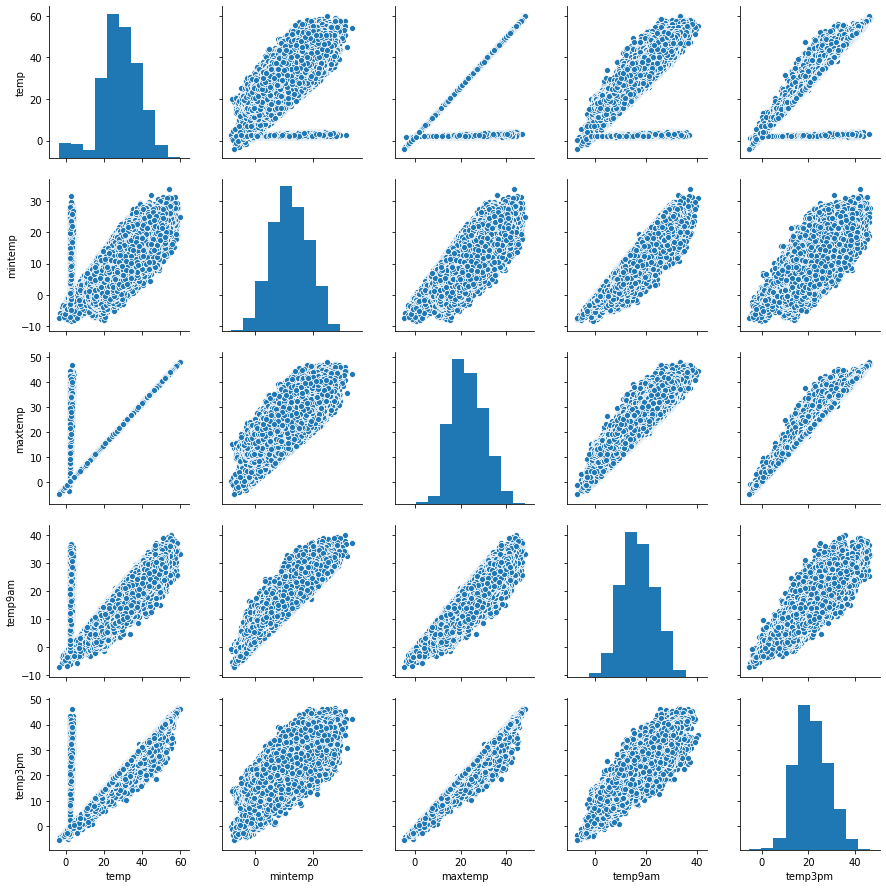

In [48]:
#temperature
sns.pairplot(data.loc[:,['temp', 'mintemp', 'maxtemp', 'temp9am', 'temp3pm']])

### pressure columns

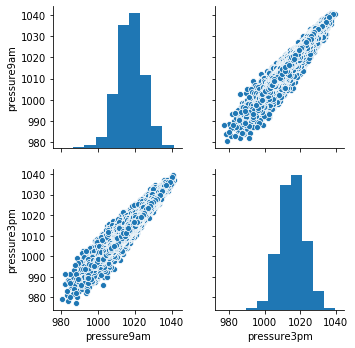

In [49]:
pressure = data.loc[:,['pressure9am', 'pressure3pm']]
sns.pairplot(pressure)

### humidity columns

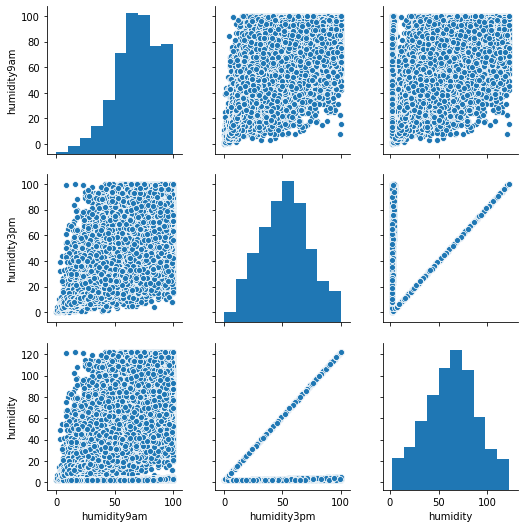

In [50]:
humidity = data.loc[:,['humidity9am', 'humidity3pm', 'humidity']]
sns.pairplot(humidity)

In [51]:
print('Null data percentage:\n')
print(round(winds.isna().sum()/data.shape[0]*100, 2))

Null data percentage:

date              0.00
location          0.00
wind_gustdir      6.56
wind_gustspeed    6.52
wind_dir9am       7.04
wind_dir3pm       2.66
wind_speed9am     0.95
wind_speed3pm     1.85
dtype: float64


# Treating Data

## Separating: data for training and data for testing

We will separate the data, to avoid overfitting. For this reason, we will reserve the last 366 days for testing.

In [52]:
total = data.shape[0]
data_testing = data.loc[data.date > '2016-06-24']
data = data.loc[data.date <= '2016-06-24']

print('Percentage of training rows: ', round(data.shape[0]/total*100,2),'%')
print('Percentage of testing rows:', round(data_testing.shape[0]/total*100,2),'%')

Percentage of training rows:  87.64 %
Percentage of testing rows: 12.36 %


## Manipulating dataset: data

**Manipulating: Date column as type datetime, raintoday and raintomorrow as binary categories**

In [53]:
# date string to date datetime:
data.loc[:,'date'] = pd.to_datetime(data.loc[:,'date'])

# yes = 1, no = 0
data.loc[:,'raintoday'] = data.loc[:,'raintoday'].apply(lambda x: 0 if x == 'No' else x)
data.loc[:,'raintoday'] = data.loc[:,'raintoday'].apply(lambda x: 1 if x == 'Yes' else x)
data.loc[:,'raintomorrow'] = data.loc[:,'raintomorrow'].apply(lambda x: 0 if x == 'No' else x)
data.loc[:,'raintomorrow'] = data.loc[:,'raintomorrow'].apply(lambda x: 1 if x == 'Yes' else x)

**Create a column for month and a column for season**

In [54]:
data['month'] = data.loc[:,'date'].apply(lambda x: x.month)

seasons = {12:'Summer', 1:'Summer', 2:'Summer', 
             3:'Fall', 4:'Fall', 5:'Fall',
             6:'Winter', 7:'Winter', 8:'Winter',
             9:'Spring', 10:'Spring', 11:'Spring'}

data['season'] = data.loc[:,'month'].apply(lambda x: seasons[x])

**Formatting location**

- some locations need to be formated and words separated (i.e. BadgerysCreek to Badgerys Creek)

In [55]:
data['location'] = data['location'].str.replace(r"([A-Z]+)", r" \1").str.strip()

**Filling NaNs with mean values per city** 

At a first try, we will desconsider those columns columns. 38%, 40% of missing is close to half of the dataset!

Columns with more than 10% NaN are:

- evaporation         42.789026
- sunshine            47.692924
- cloud9am            37.735332
- cloud3pm            40.152469

We will consider using them later, maybe some missing cells could be just zero values.

In [56]:
data = data.drop(['evaporation', 'sunshine', 'cloud9am', 'cloud3pm'],axis=1)

**Dropping other columns**

- ***modelo_vigente***: this column corresponds to the results of a previous prediction model, we won't need it for fitting the model, only for further comparisons

In [57]:
data = data.drop('modelo_vigente',axis=1)

**Creating new variable: rainfall_index**

*rainfall_index* will be the mean amount of rainfall for that location

In [58]:
rainfall_index = data.groupby(by='location').describe().loc[:,'rainfall'].loc[:,'mean']
data['rainfall_index'] = data.loc[:,'location'].apply(lambda x: rainfall_index.loc[x])

**Dropping "*temp*"**

*temp* is clearly dependent on the maximum temperature, and it also contains some missing values.

In [59]:
data = data.drop('temp', axis=1)

**Adding a mean value for the proportion of raining the next day for each city**

- *raintomo_mean*: will be the respective prob of rain the next day for the current city. Its the sum of 'raintomorro' by the total of rows of the city.

In [60]:
#get a df of mean prob of raining the next day for each city
rainto_mean = data[['location', 'raintomorrow']].groupby(by='location').mean().reset_index()

my_dict = {}

for loc in rainto_mean.location.unique():
    my_dict[loc] = round(rainto_mean.query(f'location == "{loc}"').raintomorrow.values[0],4)
    
data['loc_rainto_mean'] = data.location.apply(lambda x: my_dict[x])

**Adding a mean value for the proportion of raining the next day for each *wind_direction***

- *raintomo_mean*: will be the respective prob of rain the next day for the current city. Its the sum of 'raintomorro' by the total of rows of the city.

In [61]:
#get a df of mean prob of raining the next day for each wind_direction
wind_rainto_mean = data[['wind_gustdir', 'raintomorrow']].groupby(by='wind_gustdir').mean().reset_index()

for loc in wind_rainto_mean.wind_gustdir.unique():
    my_dict[loc] = round(wind_rainto_mean.query(f'wind_gustdir == "{loc}"').raintomorrow.values[0],4)
    
data['wind_rainto_mean'] = data.wind_gustdir.apply(lambda x: my_dict[x] if type(x) == str else x)

**Adding coordinate (*lat*, *lon*) columns and dropping *location***

- We will add latitude and longitude as a mean for transforming the location in numeric values, instead of using get_dummies.
- We won't need location anymore so we will drop it.

In [64]:
# user_agent="my-application"
geolocator = Nominatim()

unique_loc = data['location'].unique()

for city in tqdm(unique_loc):
    geoloc = geolocator.geocode(city,'Australia')
    my_dict[city + '_lat'] = geoloc.latitude
    my_dict[city + '_lon'] = geoloc.longitude
    
data['location_lat'] = data.location.apply(lambda x: my_dict[x + '_lat'] if type(x) == str else x)
data['location_lon'] = data.location.apply(lambda x: my_dict[x + '_lon'] if type(x) == str else x)



  0%|                                                                                           | 0/49 [00:00<?, ?it/s]

  2%|█▋                                                                                 | 1/49 [00:03<02:36,  3.25s/it]


GeocoderTimedOut: Service timed out

In [65]:
data

,date,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,...,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,month,season,rainfall_index,loc_rainto_mean,wind_rainto_mean
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,...,44.0,W,WNW,20.0,24.0,12,Summer,1.938321,0.2072,0.2643
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,...,44.0,NNW,WSW,4.0,22.0,12,Summer,1.938321,0.2072,0.2810
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,...,46.0,W,WSW,19.0,26.0,12,Summer,1.938321,0.2072,0.2314
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,...,24.0,SE,E,11.0,9.0,12,Summer,1.938321,0.2072,0.1882
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,...,41.0,ENE,NW,7.0,20.0,12,Summer,1.938321,0.2072,0.2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141824,2016-06-18,Uluru,8.7,18.9,0.0,80.0,46.0,1019.7,1016.8,12.3,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN
141825,2016-06-19,Uluru,3.4,18.3,0.0,77.0,40.0,1020.3,1017.3,8.2,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN
141826,2016-06-20,Uluru,2.2,21.5,0.0,80.0,23.0,1017.4,1014.1,8.5,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN
141827,2016-06-21,Uluru,7.8,25.9,0.0,57.0,25.0,1013.9,1011.5,12.3,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN


**precipitation during the 24h?**

Let's suppose that we consider 3pm...

Will it rain tomorrow? What time should prevision be made? 3pm?

In [61]:
# data['prec_last_24h'] = data['precipitation3pm'] + data['precipitation9am']
# NO FIM NÂO MUDOU SCORE, PRATICAMENTE O MESMO!

# Pipeline

## importing libraries

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

## Preparing Data: X and y (train and test) and comparison with *modelo_vigente*

In [68]:
#teste dataframe, no cities and no season!
teste = data.drop(['rainfall','amountOfRain','month',
                   'precipitation3pm','precipitation9am'],axis=1).dropna()
teste = pd.get_dummies(teste)

In [69]:
data

,date,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,...,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,month,season,rainfall_index,loc_rainto_mean,wind_rainto_mean
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,...,44.0,W,WNW,20.0,24.0,12,Summer,1.938321,0.2072,0.2643
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,...,44.0,NNW,WSW,4.0,22.0,12,Summer,1.938321,0.2072,0.2810
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,...,46.0,W,WSW,19.0,26.0,12,Summer,1.938321,0.2072,0.2314
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,...,24.0,SE,E,11.0,9.0,12,Summer,1.938321,0.2072,0.1882
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,...,41.0,ENE,NW,7.0,20.0,12,Summer,1.938321,0.2072,0.2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141824,2016-06-18,Uluru,8.7,18.9,0.0,80.0,46.0,1019.7,1016.8,12.3,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN
141825,2016-06-19,Uluru,3.4,18.3,0.0,77.0,40.0,1020.3,1017.3,8.2,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN
141826,2016-06-20,Uluru,2.2,21.5,0.0,80.0,23.0,1017.4,1014.1,8.5,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN
141827,2016-06-21,Uluru,7.8,25.9,0.0,57.0,25.0,1013.9,1011.5,12.3,...,NaN,NaN,NaN,NaN,NaN,6,Winter,0.519227,0.0674,NaN


In [88]:
teste = teste.loc[teste.date > '2015-06-24']

In [89]:
#determine X and y
split_with_time = True

if split_with_time:
    before = teste.loc[teste.date <= '2016-06-24']
    after = teste.loc[teste.date > '2016-06-24']

    X_train =  before.drop(['raintomorrow','date'],axis=1)
    X_test = after.drop(['raintomorrow','date'],axis=1)

    y_train =  before.loc[:,'raintomorrow']
    y_test = after.loc[:,'raintomorrow']

else:
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    
#main data, in case tests are needed
X = teste.drop(['raintomorrow','date'],axis=1)
y = teste.loc[:,'raintomorrow']

#dummies
X = pd.get_dummies(X)

In [91]:
X_test

,mintemp,maxtemp,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,humidity,...,wind_dir3pm_SSE,wind_dir3pm_SSW,wind_dir3pm_SW,wind_dir3pm_W,wind_dir3pm_WNW,wind_dir3pm_WSW,season_Fall,season_Spring,season_Summer,season_Winter


In [ ]:
# Standardize data:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [84]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=8),
            n_estimators=50,
            learning_rate=.05)

results = cross_val_score(adaboost, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8090550048925197, 0.009541760368603687)

In [85]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
roc_auc_score(y_test, adaboost.predict_proba(X_test)[:, 1])

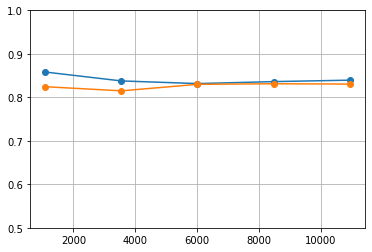

In [83]:
curves = learning_curve(adaboost, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

In [73]:
#import modelo_vigente
modelo_vigente = pd.read_csv('rain_data_aus.csv').dropna().modelo_vigente


## MODELO_VIGENTE ROC CURVE
dframe = pd.read_csv('rain_data_aus.csv')
mv_y_pred_prob = dframe.modelo_vigente
mv_y_test = dframe.raintomorrow.apply(lambda x: 1 if x == 'Yes' else 0)

## Calculating the mean

In [74]:
the_mean = y_train.mean()
y_pred = y_train.apply(lambda x: the_mean).iloc[0:y_test.shape[0]]

accuracy_score(y_test, y_pred.apply(lambda x: 1 if x>0.5 else 0))

nan

## Logistic regression

In [75]:
#instantiate the model and fit
logreg = LogisticRegression()

logreg.fit(X_train_std, y_train)

# let's evaluate - new data comes in:
predictions = logreg.predict(X_test_std)
pred_proba = logreg.predict_proba(X_test_std)

results = pd.DataFrame({'prob_not_rain': pred_proba[:,0], 
                          'prob_rain': pred_proba[:,1], 
                          'predictions':predictions,
                          'y_test':y_test})

accuracy_score(y_test, predictions)

NameError: name 'X_test_std' is not defined

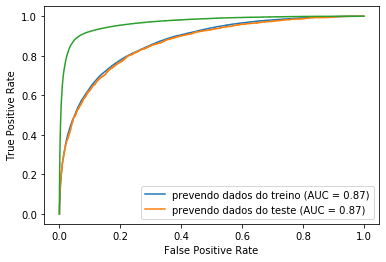

In [25]:
# results
fig, ax = plt.subplots()

plot_roc_curve(logreg, X_train_std, y_train, ax=ax, name = 'prevendo dados do treino')
plot_roc_curve(logreg, X_test_std, y_test, ax=ax, name = 'prevendo dados do teste')

fpr, tpr, thresholds = roc_curve(mv_y_test, mv_y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.show();

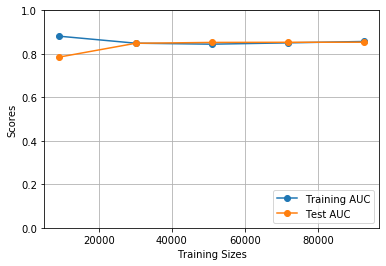

In [27]:
curve = learning_curve(logreg, X_train, y_train, cv=KFold(10), scoring='roc_auc')
# curve = learning_curve(modelinho, X, y, scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

## Decision Trees

Remember: we don't need to standardize the data here!

100%|██████████| 9/9 [00:27<00:00,  3.04s/it]


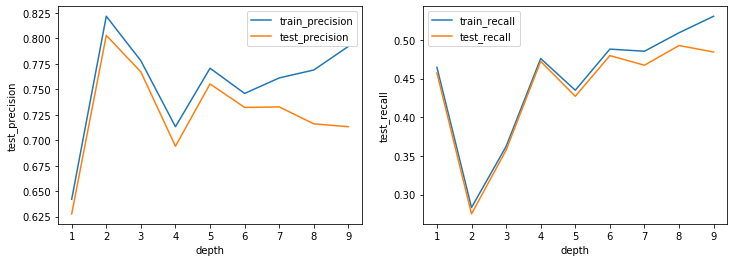

In [64]:
df = pd.DataFrame()

for N in tqdm(np.arange(1,10,1)):

    tree = DecisionTreeClassifier(max_depth=N)
    tree.fit(X_train, y_train)

    # TRAIN SET and get precision and recall
    tn, fp, fn, tp = confusion_matrix(y_train,tree.predict(X_train)).ravel()
    a1, a2 = tp / (fp + tp), tp / (fn + tp)

    # TEST SETand get precision, recall and test_score
    tn, fp, fn, tp = confusion_matrix(y_test,tree.predict(X_test)).ravel()
    a3, a4 = tp / (fp + tp), tp / (fn + tp)
    test_score = (tn + tp)/(tn + fp + fn + tp)


    minidf = pd.DataFrame({'depth':N, 'train_precision':a1, 
                          'train_recall':a2, 'test_precision':a3,
                          'test_recall':a4, 'test_score':test_score}, index=[0])
    df = pd.concat([df,minidf])
    
df = df.reset_index(drop=True)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

sns.lineplot(x='depth', y='train_precision', data=df, label = 'train_precision',ax=ax[0])
sns.lineplot(x='depth', y='train_recall', data=df, label = 'train_recall',ax=ax[1])
sns.lineplot(x='depth', y='test_precision', data=df, label = 'test_precision',ax=ax[0])
sns.lineplot(x='depth', y='test_recall', data=df, label = 'test_recall',ax=ax[1])

accuracy_score:  0.8343118069145466


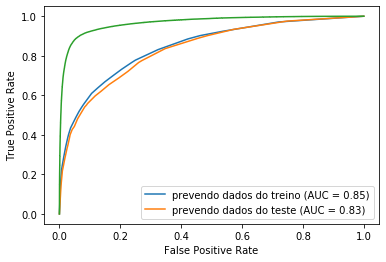

In [73]:
# fit with max_depth=7
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print('accuracy_score: ', acc_score)

# results
fig, ax = plt.subplots()

plot_roc_curve(tree, X_train, y_train, ax=ax, name = 'prevendo dados do treino')
plot_roc_curve(tree, X_test, y_test, ax=ax, name = 'prevendo dados do teste')

fpr, tpr, thresholds = roc_curve(mv_y_test, mv_y_pred_prob)
plt.plot(fpr, tpr, label='Decision Tree')
plt.show();

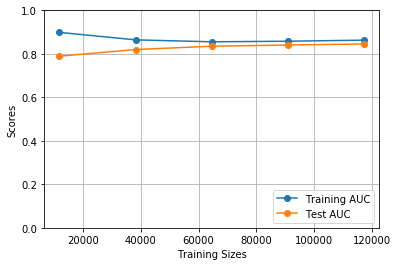

In [66]:
modelinho = DecisionTreeClassifier(max_depth=7)

curve = learning_curve(modelinho, X, y, cv=KFold(10), scoring='roc_auc')
# curve = learning_curve(modelinho, X, y, scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

## Manual log:
- mean() acc_score: 0.767051
- logreg acc_score: 0.844313
- logreg auc_test: 0.87
- tree acc_score: 0.83793578
- tree auc_test: 0.85